In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$\begin{equation}
M(R) = 2\pi\Sigma_{g}\int_{0}^{R} e^{-R'/R_{g}-R_{m}/R'}R'dR'
\end{equation}$$

$$\begin{equation}
M = 2\pi\Sigma_{g}R^{2}\int_{0}^{1}u e^{-Ru/R_{g}-R_{m}/Ru}du
\end{equation}$$
donde hicismos el cambio de variable $u = R'/R$

In [2]:
def M_g_I(u,R,R_d=2.,R_m=4.):
    return u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
def M_g_II(u,R,R_d=3.2,R_m=4.):
    return u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))

In [3]:
#Cosntants
G = 4.302e-6
Sigma_g_I = (1905.0e6)*0.25
Sigma_g_II = (536.0e6)*0.25
C_I = 2.*np.pi*Sigma_g_I
C_II = 2.*np.pi*Sigma_g_II

In [4]:
R = np.linspace(0.1,15.,100)

In [5]:
def Integral_Mg_I(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_I,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    return np.array(Integral_M_g)
def Integral_Mg_II(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_II,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    return np.array(Integral_M_g)

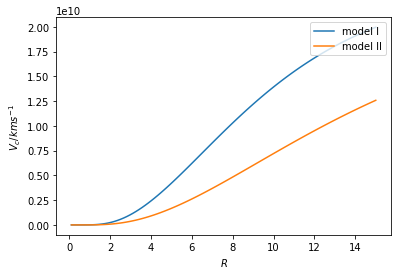

In [6]:
M_I = R**2.*C_I*Integral_Mg_I(R)
M_II = R**2.*C_II*Integral_Mg_II(R)
plt.plot(R,M_I,label='model I')
plt.plot(R,M_II,label='model II')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

y como $$\begin{equation}
V^{2}_{c} = \frac{GM(R)}{R} = \frac{2\pi G\Sigma_{g}R^{2}\int_{0}^{1}ue^{-Ru/R_{g}-R_{m}/Ru} du}{R} = 2\pi G\Sigma_{g}R\int_{0}^{1}ue^{-Ru/R_{g}-R_{m}/Ru} du
\end{equation}$$

In [7]:
def V_c_g_I(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_I,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    Integral = np.array(Integral_M_g)
    V = l*Integral
    return V
def V_c_g_II(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_II,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    Integral = np.array(Integral_M_g)
    V = l*Integral
    return V

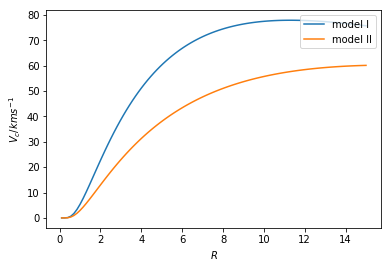

In [8]:
Vc_I = np.sqrt(G*C_I*V_c_g_I(R))
Vc_II = np.sqrt(G*C_II*V_c_g_II(R))
plt.plot(R,Vc_I,label='model I')
plt.plot(R,Vc_II,label='model II')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

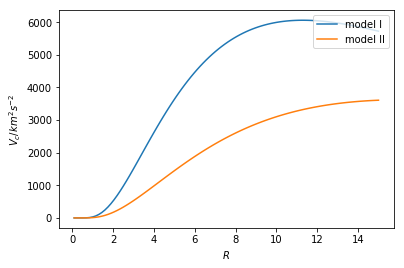

In [9]:
Vc_2_I = G*C_I*V_c_g_I(R)
Vc_2_II = G*C_II*V_c_g_II(R)
plt.plot(R,Vc_2_I,label='model I')
plt.plot(R,Vc_2_II,label='model II')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km^{2} s^{-2}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()